<a href="https://colab.research.google.com/github/hmarathe420/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - Car Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe

## **Project Summary -**

## **GitHub Link -**

GitHub Link --> [Tap Here](https://github.com/hmarathe420/Car_Price_Prediction/tree/main)

## **Problem Statement**


As an aspiring data scientist, my task is to develop a machine learning model that accurately predicts the prices of cars based on various attributes and features. The goal of this project is to create a predictive model that assists potential buyers and sellers in estimating the fair market value of a car, considering factors such as its make, model, mileage, year of manufacture, fuel type, and more.

## **Data Collection & Understanding**

In [10]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Mounting Google Drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# loading dataset from drive
df = pd.read_csv("/content/drive/MyDrive/Car Price Prediction InternPe/quikr_car.csv")

In [13]:
# Top 5 rows of diabetes dataset
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [14]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [15]:
# Describing the dataset
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [16]:
# shape of dataset
df.shape

(892, 6)

In [17]:
# number of duplicated rows of dataset
df.duplicated().sum()

94

In [18]:
# null values in dataset
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


  * The dataset contains a total of 892 rows and 6 columns. Each row represents a car entry, and there are 892 cars in total. The dataset has been organized with 6 different pieces of information for each car.


* Within the dataset, you've identified that there are 94 duplicated entries. This means that some cars are listed multiple times in your dataset, and you might need to investigate or handle these duplicates to ensure data accuracy.

Column Names:
The dataset columns have the following names:

* name: This column likely contains the name or model of the car.
* company: This column likely contains the company that manufactures the car.
* year: This column contains the year of manufacture for each car.
* Price: This column contains the price of each car.
* kms_driven: This column contains the distance the car has been driven (in kilometers).
* fuel_type: This column indicates the type of fuel the car uses (e.g., petrol, diesel, etc.).
* Null Values:

I've found that there are null values present in the kms_driven column, with a count of 52. This means that there are 52 cars in the dataset for which the information about the distance they've been driven is missing or not available.

Fuel Type Information:
There are 55 cars for which the information about the fuel type is not provided.

In summary, we can say that the dataset contains information about 892 cars. It has columns indicating the name, company, year of manufacture, price, kilometers driven, and fuel type for each car. There are some duplicated entries that need to be addressed. Additionally, the kms_driven column has 52 missing values, and the fuel_type column has 55 missing values.

## Data Cleaning & Pre-Processing

In [45]:
# Removing Kmssuffix from the kms_driven column values
for i in df['kms_driven']:
  if type(i) != float:
    kms = i.split(" ")[0]
    df['kms_driven'] = df['kms_driven'].replace(i, kms)

  else:
    pass

In [55]:
# replacing petrol with 0
df['kms_driven'] =df['kms_driven'].replace('Petrol', 0)

In [59]:
# replacing nul values with 0
df['kms_driven'] =df['kms_driven'].replace(np.nan, 0)

In [93]:
# removing comma from the text values in kms_driven column
for i in df['kms_driven']:
  if type(i)== str:
    x = i.replace(',','')
    y = int(x)
    df['kms_driven'] = df['kms_driven'].replace(i,y)

In [140]:
# converting kms_driven datatype with int
df['kms_driven'] = df['kms_driven'].astype(int)

In [106]:
# replacing
df['kms_driven'] =  df['kms_driven'].replace(0,  df['kms_driven'].mean())

In [108]:
# replacing null or 0 with mean in kms_driven column
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven     0
fuel_type     55
dtype: int64

In [110]:
# Removing null values from the dataset
df.dropna(inplace = True)

In [111]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [113]:
df.duplicated().sum()

92

In [114]:
# Removing duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [115]:
df.duplicated().sum()

0

In [128]:
# Replacing ask for price with 0
df['Price'] = df['Price'].replace('Ask For Price', 0)

In [136]:
# Converting datatype of price column from object to int
for i in df['Price']:
  if type(i) != int:
    x = i.replace(",","")
    y = int(x)
    df['Price'] = df['Price'].replace(i,y)

In [141]:
# Converting datatype of target variable
df['Price'] = df['Price'].astype(int)

In [147]:
# Replacing 0 or null value with mean of target column
df['Price'] = df['Price'].replace(0,df['Price'].mean())

In [218]:
# converting datatype of year column
df['year'] = df['year'].astype(int)

## **EDA - Data Visualization**

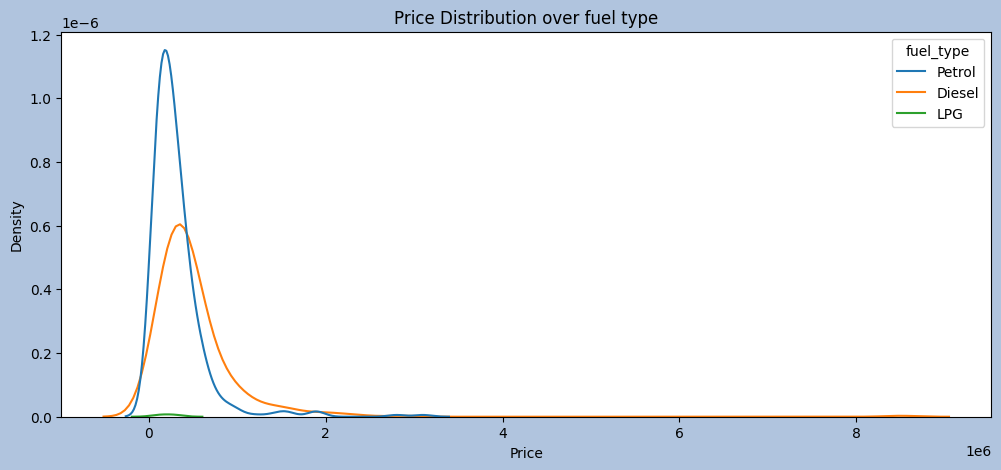

In [173]:
# ploting price distribution plot with fuel type
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.kdeplot(data =df , x = 'Price', hue = 'fuel_type')
plt.title("Price Distribution over fuel type")
plt.plot()
plt.show()

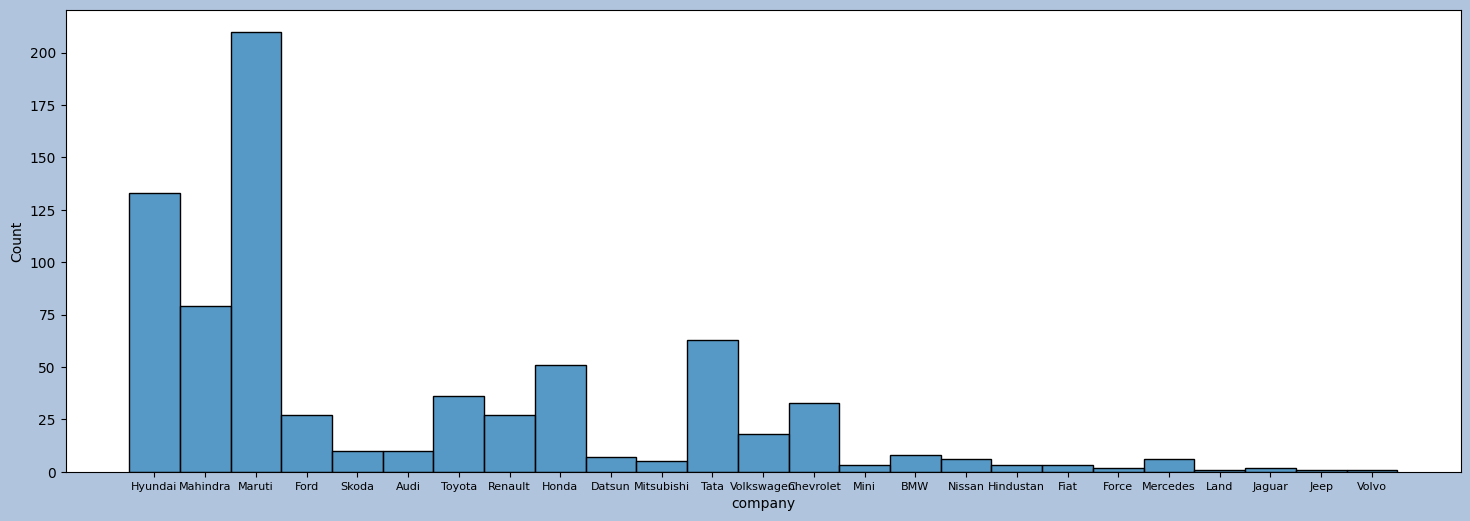

In [236]:
# Company Distribution using histplot
plt.figure(figsize = (18,6), facecolor = 'lightsteelblue')
sns.histplot(data = df , x ='company')
plt.xticks(fontsize = 8)
plt.plot()
plt.show()

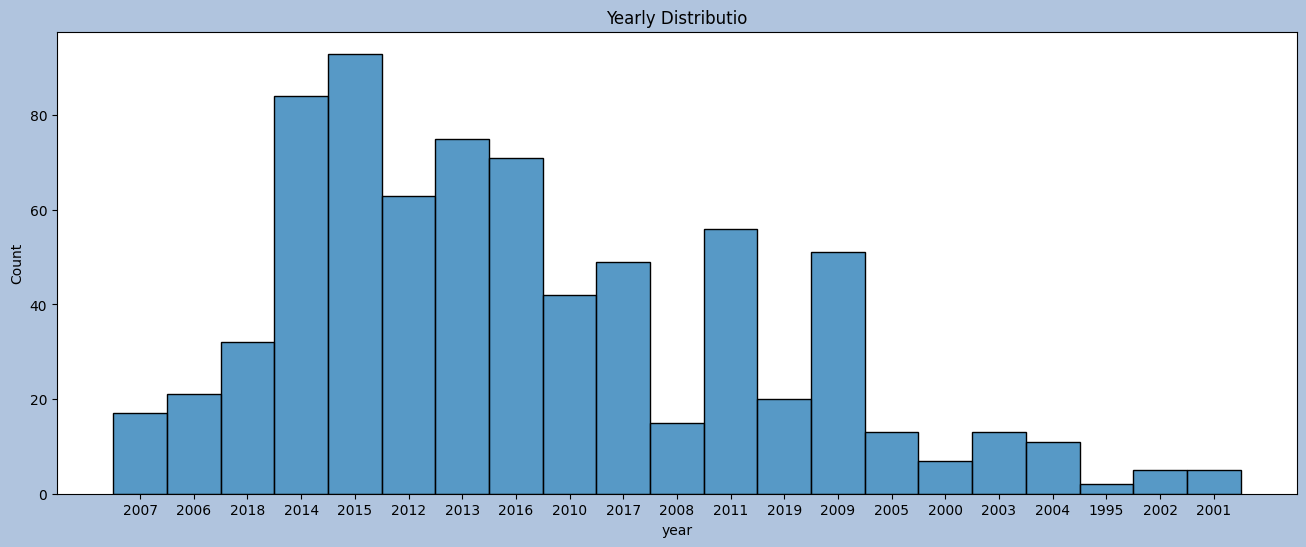

In [215]:
# Yearly distribution
plt.figure(figsize = (16,6), facecolor = 'lightsteelblue')
sns.histplot(data = df , x =  'year', binwidth= 1)
plt.title("Yearly Distributio")
plt.plot()
plt.show()

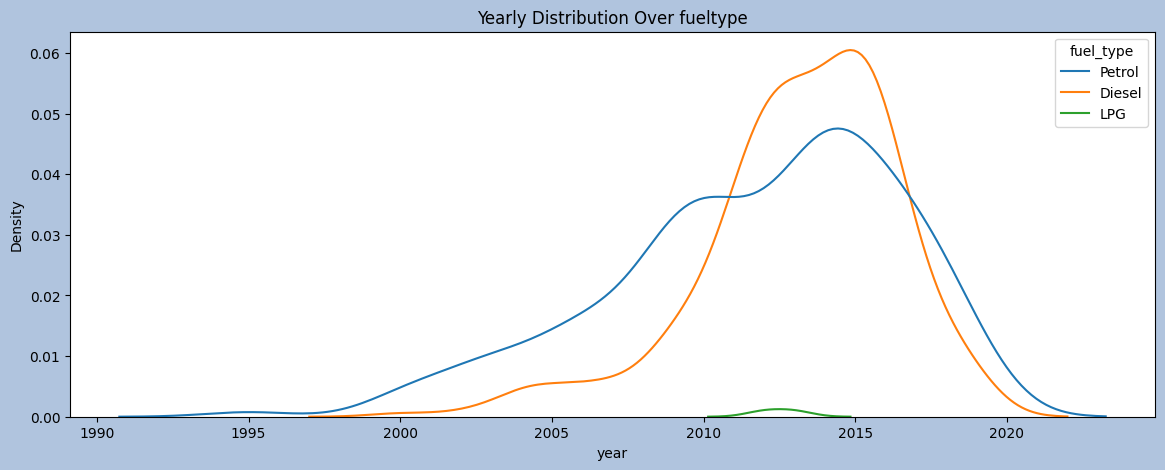

In [224]:
# ploting graph for yearly distribution with fueltype
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.kdeplot(data = df , x = 'year', hue = 'fuel_type')
plt.title("Yearly Distribution Over fueltype")
plt.plot()
plt.show()

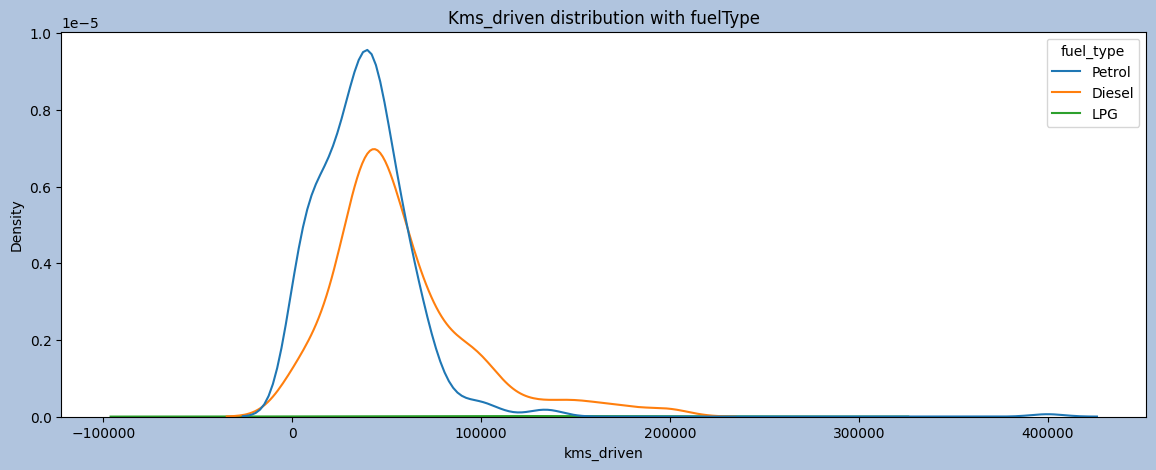

In [243]:
# ploting kde plot for distribution of kms driven with fuel type.
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.kdeplot(data = df , x = 'kms_driven', hue = 'fuel_type')
plt.title("Kms_driven distribution with fuelType")
plt.plot()
plt.show()

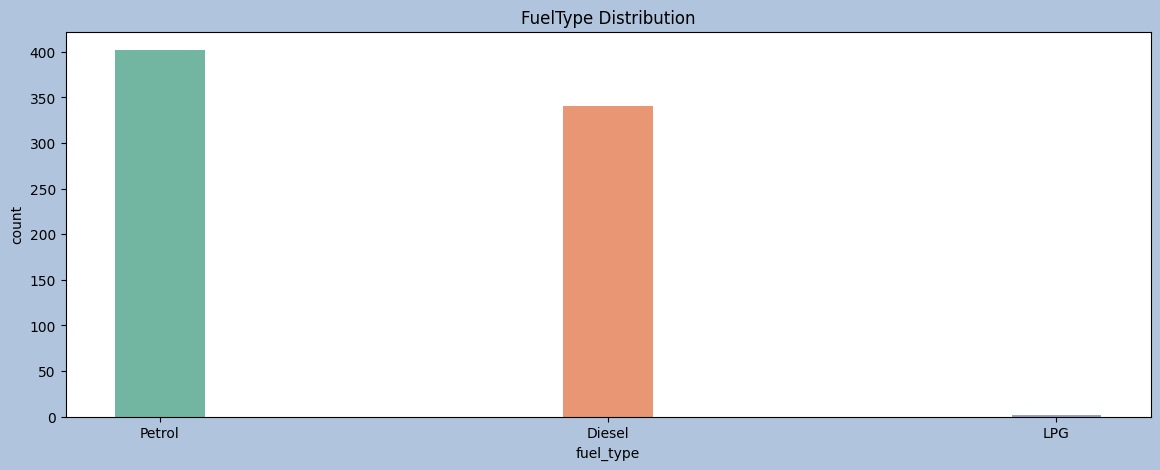

In [256]:
# Ploting countplot for fueltype distribution
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.countplot(data = df , x = 'fuel_type',palette="Set2", width = 0.2)
plt.title("FuelType Distribution")
plt.plot()
plt.show()

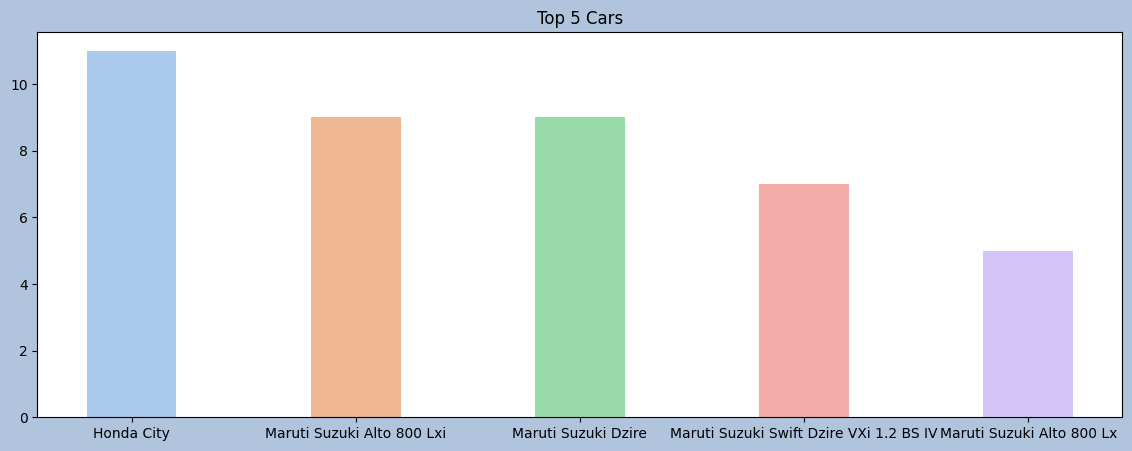

In [297]:
# Ploting Top 5 occuring cars
car_name = pd.DataFrame(df['name'].value_counts()).reset_index().sort_values(by ='name', ascending = False).head(5)['index'].values
freq = pd.DataFrame(df['name'].value_counts()).reset_index().sort_values(by ='name', ascending = False).head(5)['name'].values
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.barplot(x = car_name, y = freq, width= 0.4, palette="pastel")
plt.title("Top 5 Cars")
plt.plot()
plt.show()

## **Data Pre-Processing and Feature Selection**

## **Machine Learning**

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***